# CSE5311: Numerical Methods for Data Analytics
## Homework 4
### Principal Component Analysis (PCA)

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [70]:
# Scikit learn has a bunch of built in datasets.  Hit 'tab' after 'load' and you will see 
# the autocomplete list.  Load the breast cancer data set we worked with in class.
from sklearn.datasets import load_breast_cancer

In [71]:
# Want to find the best feature reduction that maximizes the variance in the data, i.e. perform PCA.
# Store the data in a pandas data.
cancer= load_breast_cancer()
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [72]:
# Look at a few rows of the data.
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
# Print out the number of rows (data) and columns (features)
print('rows :',df.shape[0])
print('columns :',df.shape[1])

('rows :', 569)
('columns :', 30)


In [74]:
# Pull the data out of the pandas data frame and assign it to numpy array.
arr=df.as_matrix()

In [75]:
# Standardize the dataset using the scikit-learn StandardScaler.   Your data should have zero mean and unit standard devication.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(arr)
scaledData=scaler.transform(arr)
print(scaledData.shape)
mean_data=scaler.mean_
print(mean_data)

(569, 30)
[  1.41272917e+01   1.92896485e+01   9.19690334e+01   6.54889104e+02
   9.63602812e-02   1.04340984e-01   8.87993158e-02   4.89191459e-02
   1.81161863e-01   6.27976098e-02   4.05172056e-01   1.21685343e+00
   2.86605923e+00   4.03370791e+01   7.04097891e-03   2.54781388e-02
   3.18937163e-02   1.17961371e-02   2.05422988e-02   3.79490387e-03
   1.62691898e+01   2.56772232e+01   1.07261213e+02   8.80583128e+02
   1.32368594e-01   2.54265044e-01   2.72188483e-01   1.14606223e-01
   2.90075571e-01   8.39458172e-02]


In [76]:
# Subtract the mean of each column from each row of the data.  You really shouln't need this as the standard scaler would
# have take care of this for you.  But, it is good practice to learn how to do this.
mean_vect=np.mean(scaledData,axis=0)
cov_mat = (scaledData - mean_vect).T.dot((scaledData - mean_vect)) / (scaledData.shape[0]-1)

#dat=np.zeros(shape=(arr.shape[0],arr.shape[1]))
#print dat.shape
#for i in range(0,arr.shape[0]):
 #   for j in range(0,arr.shape[1]):
#      dat[i][j]=scaledData[i][j]-mean_data[j]

In [77]:
# Form the covariance matrix. Store it in a variable called covMat.
covMat=cov_mat

#Alternate method to find a covariance matrix is to use numpy.cov
covariance_matrix=np.cov(scaledData.T)

In [78]:
# Get the eigenvalues and eigenvectors of the covariance matrix and store them two variables.
evals, evecs = np.linalg.eigh(covMat)

In [79]:
# Get the total number of eigenvalues.
number=evals.shape[0]
print number

30


In [80]:
# Check if all the eigenvectors are unit length.  Hint: use np.testing.assert_array_almost_equal on each of eigenvectors.
for ev in evecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
    

In [81]:
# Make a list of (eigenvalue, eigenvector) tuples.
epair = [(np.abs(evals[i]), evecs[:,i]) for i in range(len(evals))]


# Sort the (eigenvalue, eigenvector) tuples from high to low.
epair.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues, i.e. print out the eigenvalues.
for i in epair:
    print(i[0])

13.3049907944
5.70137460373
2.82291015501
1.98412751773
1.65163324233
1.2094822398
0.676408881701
0.47745625469
0.417628782108
0.351310874882
0.294433153491
0.261621161366
0.241782421328
0.157286149218
0.0943006956011
0.0800034044774
0.0595036135304
0.0527114222101
0.049564700213
0.0312142605531
0.0300256630904
0.0274877113389
0.0243836913546
0.0180867939843
0.0155085271344
0.00819203711761
0.00691261257918
0.0015921360012
0.000750121412719
0.000133279056664


In [85]:
# Calculate the percent variance explained by each eigenvector.  To do this, sum all the eigenvalues and store that number
# in a variable.  Then create a new array where each entry is an eigenvalue divided by the total sum of the eigenvalues.
# Then call np.cumsum to get the cummaltive sum illustrating how much variance is explained by included one additional
# eigenvector in your projection matrix.  Make sure you are using the eigenvalues in sorted (high to low) order.

tot = np.sum(evals)
var_exp = [(i / tot)*100 for i in sorted(evals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)



In [86]:
# Print out the variance explained amount in the cumsum array.
print cum_var_exp

[  44.27202561   63.24320765   72.63637091   79.23850582   84.73427432
   88.75879636   91.00953007   92.59825387   93.98790324   95.15688143
   96.13660042   97.00713832   97.81166331   98.33502905   98.64881227
   98.91502161   99.1130184    99.28841435   99.45333965   99.55720433
   99.65711397   99.74857865   99.82971477   99.88989813   99.94150237
   99.96876117   99.99176271   99.99706051   99.99955652  100.        ]


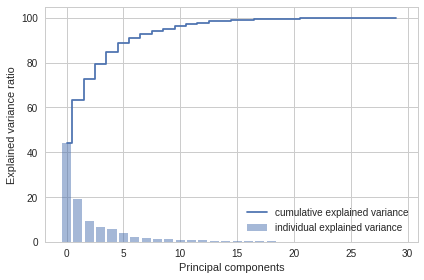

In [97]:
# Visualize the explained variance.  Use the plt.sytle.context to set the style for the specific plot.  See 
# expected out put below.
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(30), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(30), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [88]:
# Add projection code here.  Let's reduce the dimensions using the leading two eigenvectors so we
# can compare to our results using scikit-learn exercise we finished in class.  So, make a projection matrix
# with the leading two eigenvectors as columns.  This will be the U matrix we discussed in class and notes.
# After you create the projection matrix, print out its size.  Does it make sense?

matrix_w = np.hstack((epair[0][1].reshape(30,1), epair[1][1].reshape(30,1)))
print matrix_w


[[-0.21890244  0.23385713]
 [-0.10372458  0.05970609]
 [-0.22753729  0.21518136]
 [-0.22099499  0.23107671]
 [-0.14258969 -0.18611302]
 [-0.23928535 -0.15189161]
 [-0.25840048 -0.06016536]
 [-0.26085376  0.0347675 ]
 [-0.13816696 -0.19034877]
 [-0.06436335 -0.36657547]
 [-0.20597878  0.10555215]
 [-0.01742803 -0.08997968]
 [-0.21132592  0.08945723]
 [-0.20286964  0.15229263]
 [-0.01453145 -0.20443045]
 [-0.17039345 -0.2327159 ]
 [-0.15358979 -0.19720728]
 [-0.1834174  -0.13032156]
 [-0.04249842 -0.183848  ]
 [-0.10256832 -0.28009203]
 [-0.22799663  0.21986638]
 [-0.10446933  0.0454673 ]
 [-0.23663968  0.19987843]
 [-0.22487053  0.21935186]
 [-0.12795256 -0.17230435]
 [-0.21009588 -0.14359317]
 [-0.22876753 -0.09796411]
 [-0.25088597  0.00825724]
 [-0.12290456 -0.14188335]
 [-0.13178394 -0.27533947]]


In [100]:
# Project the data using the projection matrix.  This requires us to take the inner product of 
# every 30-dim data point with the each of columns in our projection matrix.
# Note: usually we would stack the eigenvectors as columns in a matrix, say U.  To project we would
# have U'*X' (when X contains data on rows and features as columns) and then we would transpose the
# result to get back a matrix with data on rows and features as columns.  So (U'*X')'=X*U.  'dot' 
# function does matrix multiply or other option is to make it a np.matrix first and then use *.

Y = scaledData.dot(matrix_w)
Y=Y*-1
print Y

[[  9.19283683   1.94858307]
 [  2.3878018   -3.76817174]
 [  5.73389628  -1.0751738 ]
 ..., 
 [  1.25617928  -1.90229671]
 [ 10.37479406   1.67201011]
 [ -5.4752433   -0.67063679]]


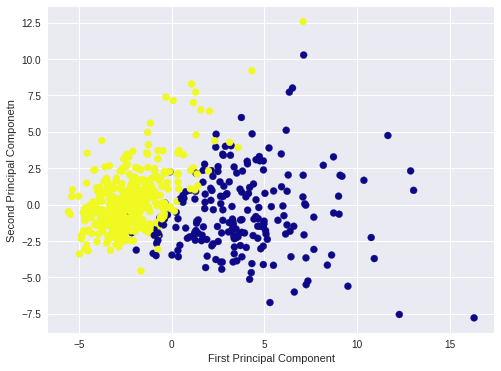

In [101]:
# Visualize the projected data.
plt.figure(figsize=(8,6))
# Set the color to be the target label from the original data.
plt.scatter(Y[:,0],Y[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Componetn')

The above plot should match what we get back from scikit-learn.